In [1133]:
%matplotlib notebook

In [1898]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

plt.style.use('seaborn-pastel')

from IPython.display import Image
from IPython.display import HTML

tf.enable_eager_execution()

tf.__version__

'1.14.0'

In [1808]:
def dense(size, activation):
    return tf.keras.layers.Dense(
        size,
        activation=activation,
        kernel_initializer=tf.random_normal_initializer(0, 1),
        bias_initializer=tf.random_normal_initializer(0, 1)
    )
    
class FFN:
    def __init__(self, width, depth, out_size=1):
        self.layers = []
        for i in range(depth):
            self.layers.append(dense(
                width, tf.sigmoid if i == 0 else tf.tanh
            ))

        # map to pixels
        self.layers.append(dense(out_size, tf.sigmoid))

    def generate_input_mesh(self, size):
        w, h = size
        ar = w / h
        x = np.linspace(0, ar, w)
        y = np.linspace(0, 1, h)
        xx, yy = np.meshgrid(x, y)
        mesh = np.stack((xx.reshape(-1), yy.reshape(-1)), axis=-1)

        return mesh

    def generate(self, z, im_size=(128, 128)):
        mesh = self.generate_input_mesh(im_size)
        # Add z to input
        result = np.concatenate((np.tile(z, (mesh.shape[0], 1)), mesh), axis=-1)

        for d in self.layers:
            result = d(result)

        img = result.numpy().reshape(*im_size[::-1], -1)
        return img if img.shape[-1] != 1 else img[:,:,0]

In [1809]:
def make_sampler(ppn_ctor, cols, rows):
    # Save the networks
    cppns = []
    for r in range(rows):
        cppns.append([])
        for c in range(cols):
            cppns[-1].append(ppn_ctor())

    # Sample from the networks
    def sampler(z, w, h):
        rows_of_images = []
        for r in range(rows):
            row_of_images = []
            for c in range(cols):
                img = cppns[r][c].generate(z, im_size=(w // cols, h // rows))
                row_of_images.append(img)

            row = np.concatenate(row_of_images, axis=1)
            rows_of_images.append(row)

        return np.concatenate(rows_of_images, axis=0)

    return sampler

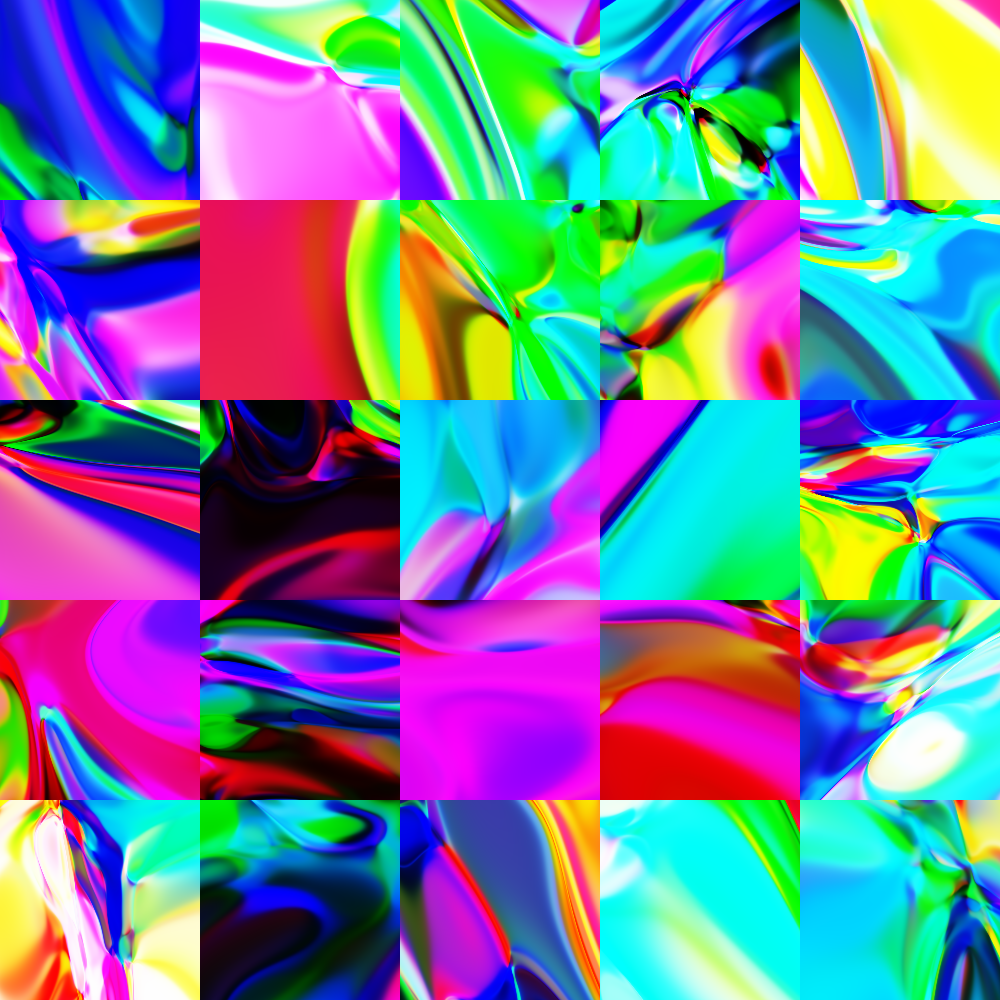

In [1894]:
imgs = make_sampler(lambda: FFN(25, 9, 3), 5, 5)(z=1, w=1000, h=1000)
plt.imsave('test.png', imgs, format='png', cmap='Greys')
Image(filename='test.png')

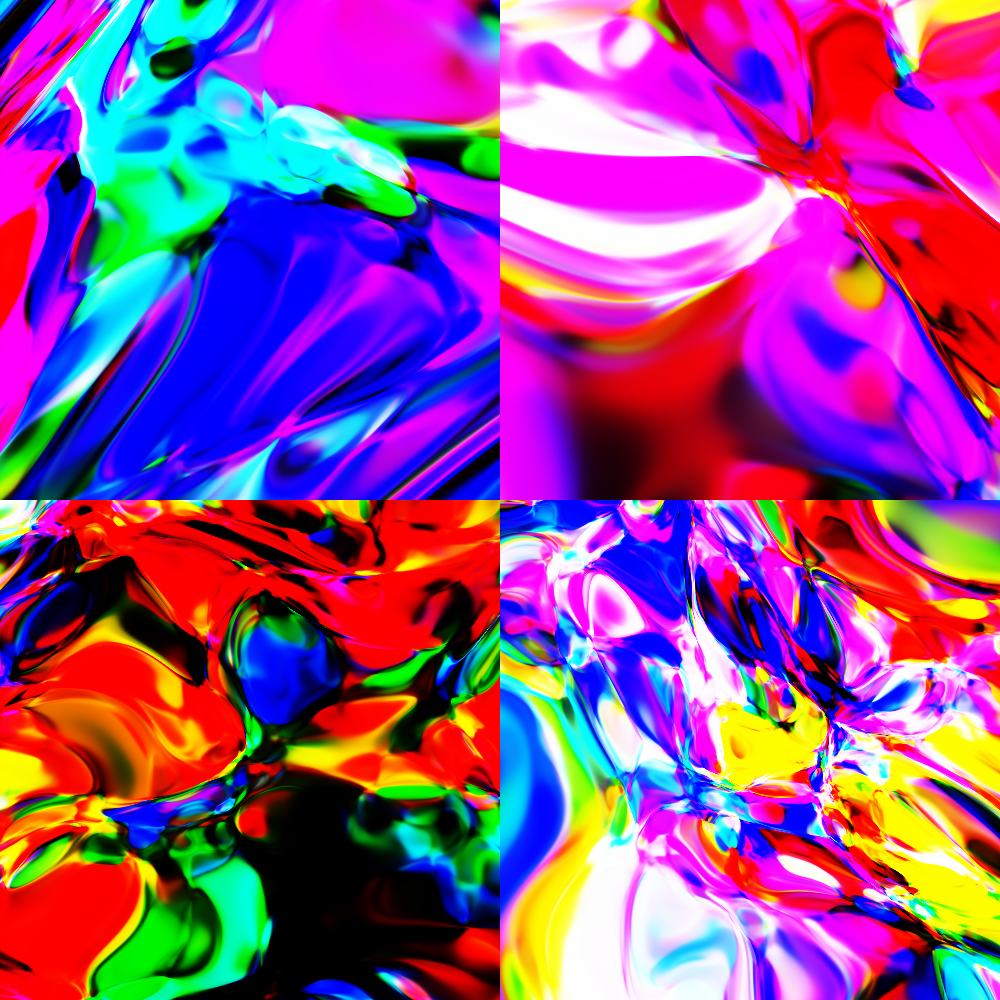

In [1820]:
imgs = make_sampler(lambda: FFN(50, 9, 3), 2, 2)(z=1, w=1000, h=1000)
plt.imsave('test.png', imgs, format='png', cmap='Greys')
Image(filename='test.png')

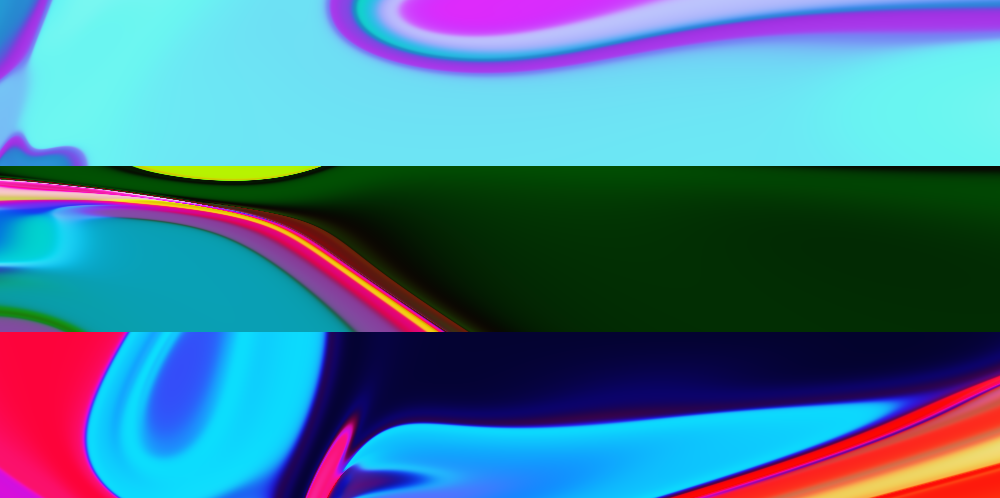

In [1864]:
imgs = make_sampler(lambda: FFN(12, 15, 3), 1, 3)(z=1, w=1000, h=500)
plt.imsave('test.png', imgs, format='png', cmap='Greys')
Image(filename='test.png')

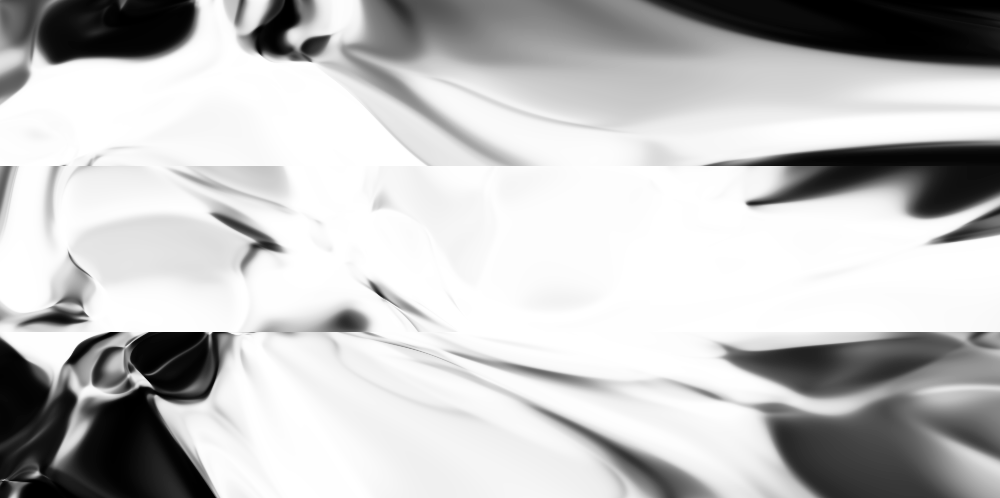

In [1875]:
imgs = make_sampler(lambda: FFN(30, 8, 1), 1, 3)(z=1, w=1000, h=500)
plt.imsave('test.png', imgs, format='png', cmap='Greys')
Image(filename='test.png')

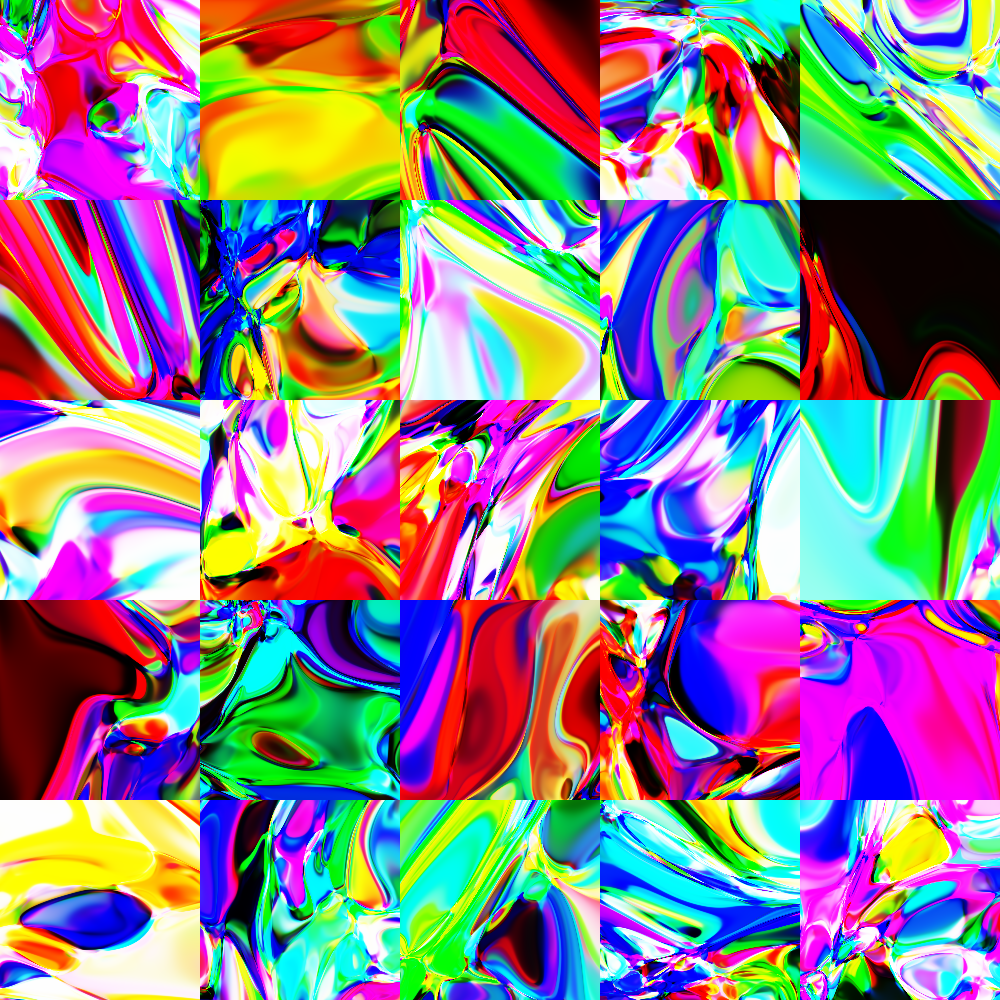

In [1916]:
imgs = make_sampler(lambda: FFN(30, 11, 3), 5, 5)(z=1, w=1000, h=1000)
plt.imsave('test.png', imgs, format='png', cmap='Greys')
Image(filename='test.png')

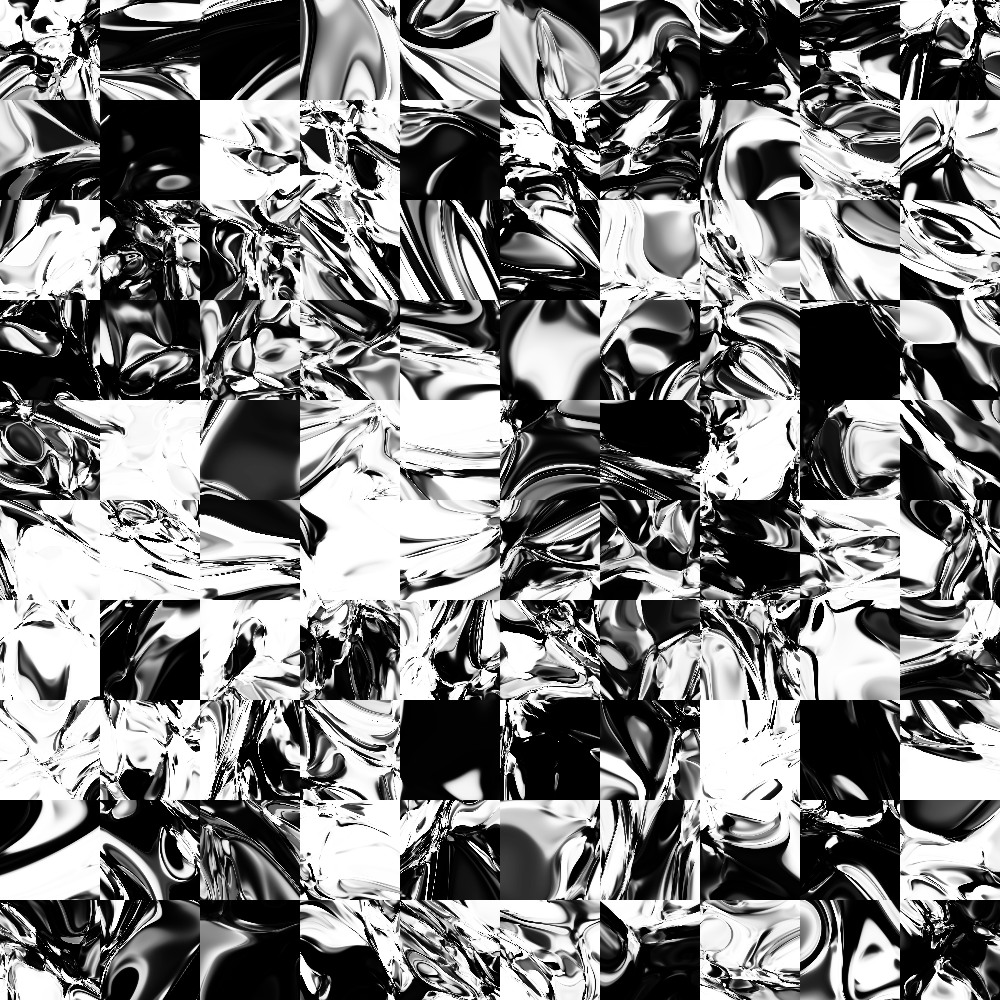

In [1917]:
imgs = make_sampler(lambda: FFN(30, 11, 1), 10, 10)(z=1, w=1000, h=1000)
plt.imsave('test.png', imgs, format='png', cmap='Greys')
Image(filename='test.png')

In [1912]:
random.choice([1, 3])

1

<IPython.core.display.Javascript object>


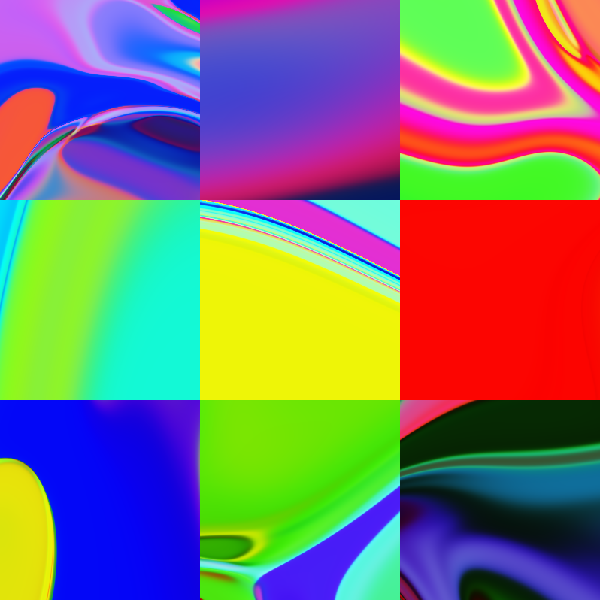

In [1886]:
sampler = make_sampler(lambda: FFN(12, 15, 3), 3, 3)
z_start = np.random.normal(0,0.1, size=32)
z_end = np.random.normal(0, 0.09, size=32)
W, H = 800, 800

img = sampler(z_start, W, H)

fig, ax = plt.subplots()
ax.axis('off')

l = ax.imshow(img, cmap='Greys', aspect='auto')
plt.tight_layout()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
fig.set_size_inches(6, 6, forward=True)

frames = 30 * 5


def animate(i):
    global z_start, z_end, frames
    lerp = np.sin(i / frames * np.pi)
    z = z_start * lerp + z_end * (1 - lerp)
    img = sampler(z, W, H)
    l.set_data(img)

ani = FuncAnimation(fig, animate, frames=frames)

# HTML(ani.to_jshtml())

In [1770]:
ani.save('anim.gif', writer='pillow', fps=30, bitrate=-1)

In [1713]:
a = np.array([[[1,2],[3,4]]])
b = np.array([[[5,6],[7,8]]])
c = np.array([[[9,10],[11,12]]])
d = np.array([[[13,14],[14,16]]])

ab = np.concatenate((a, b), axis=-1)
cd = np.concatenate((c, d), axis=-1)
np.concatenate((ab, cd), axis=0).shape

(2, 2, 4)